In [2]:
!pip install pyrosm
!pip install matplotlib
!pip install networkx
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp310-cp310-linux_x86_64.whl
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp310-cp310-linux_x86_64.whl size=7461311 sha256=98fbdd0527dac29dc196d9aa045347c717912fc989dbda028ae4cfc62259d11d
  Stored in directory: /root/.cache/pip/wheels/18/21/22/b07b96a708420e351c553188667cfd6ebc7e78a011a8708cf4
  Created wheel for cykhash: filename=cykhash-2.0.1-cp310-cp310-linux_x86_64.whl size=3366540 sha256=5044f59ec0341808ed5f9abf4792a1b3033b4591d98399a5676f1c12494b4e

In [1]:
from pyrosm import OSM
from pyrosm import get_data
import matplotlib
import pyrosm
import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx as ox
pd.set_option('display.max_columns', None)

# New Section

In [8]:
# Initialize the OSM parser object
box = [-0.1705,51.4911,-0.0796,51.5221]
osm = OSM('greater-london-latest.osm.pbf', bounding_box=box)
print(type(osm))

<class 'pyrosm.pyrosm.OSM'>


In [9]:
# By default pyrosm reads all elements with POI information
# Here, it read only "tourism" tag with specific tourism types by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'tourism': ["aquarium", "attraction", "historical building", "monument", "museum", "theme_park", "zoo", "viewpoint"]}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["tourism"]
#pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot all matching point in london
#ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

In [6]:
# since the Geodataframe not only include points location, also includes polygon location, we need to take them out
tourism_spot = osm.get_data_by_custom_criteria(custom_filter=custom_filter, keep_nodes=False)

In [10]:
import gc
gc.collect()

18509360

In [ ]:
print(len(tourism_spot))
tourism_spot.head()

371


,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,phone,ref,url,visible,website,attraction,museum,tourism,zoo,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,Leicester Square,None,None,None,None,None,False,None,None,None,attraction,None,4082589,1688169735,20,"{""leisure"":""park"",""wikidata"":""Q848912"",""wikipe...",way,"POLYGON ((-0.12971 51.51067, -0.12971 51.51047...",NaN
1,None,None,None,None,None,None,None,Mixed Bathing Pond No 3,None,None,None,None,None,False,None,None,None,attraction,None,4255486,1688320346,14,"{""natural"":""water"",""water"":""pond""}",way,"POLYGON ((-0.16620 51.55958, -0.16628 51.55956...",NaN
2,None,None,None,None,None,None,None,Horse Guards Parade,None,None,None,None,None,False,None,None,None,attraction,None,4256958,1687822353,33,"{""alt_name"":""Horseguards Parade"",""area"":""yes"",...",way,"POLYGON ((-0.12766 51.50550, -0.12751 51.50516...",NaN
3,None,None,None,None,None,None,None,Cecil Court,None,None,None,None,None,False,None,None,None,attraction,None,4361223,1622470128,9,"{""bicycle"":""no"",""highway"":""pedestrian"",""lit"":""...",way,"LINESTRING (-0.12828 51.51072, -0.12703 51.51074)",NaN
4,London,None,96,The British Library,NW1 2DB,Euston Road,None,British Library,Mo-Th 09:30-20:00; Sa 09:30-17:00; Su 11:00-17...,None,+44 330 333 1144,None,None,False,https://www.bl.uk/,None,None,attraction,None,4680891,1688939710,44,"{""air_conditioning"":""yes"",""alt_name"":""New Brit...",way,"POLYGON ((-0.12892 51.53014, -0.12871 51.53023...",NaN


In [ ]:
# to get the lat and lon of the non-point location
tourism_spot1 = tourism_spot.to_crs(4326)
tourism_spot1['lon'] = tourism_spot1.centroid.x
tourism_spot1['lat'] = tourism_spot1.centroid.y
tourism_spot1.head()

/var/folders/mp/_vf1ml7x7wgc597c5050l7n80000gn/T/ipykernel_15423/1381620553.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tourism_spot1['lon'] = tourism_spot1.centroid.x
/var/folders/mp/_vf1ml7x7wgc597c5050l7n80000gn/T/ipykernel_15423/1381620553.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tourism_spot1['lat'] = tourism_spot1.centroid.y


,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,zoo,id,timestamp,version,tags,osm_type,geometry,changeset,lon,lat
0,None,None,None,None,None,None,None,Leicester Square,None,None,...,None,4082589,1688169735,20,"{""leisure"":""park"",""wikidata"":""Q848912"",""wikipe...",way,"POLYGON ((-0.12971 51.51067, -0.12971 51.51047...",NaN,-0.130087,51.510425
1,None,None,None,None,None,None,None,Mixed Bathing Pond No 3,None,None,...,None,4255486,1688320346,14,"{""natural"":""water"",""water"":""pond""}",way,"POLYGON ((-0.16620 51.55958, -0.16628 51.55956...",NaN,-0.166104,51.560150
2,None,None,None,None,None,None,None,Horse Guards Parade,None,None,...,None,4256958,1687822353,33,"{""alt_name"":""Horseguards Parade"",""area"":""yes"",...",way,"POLYGON ((-0.12766 51.50550, -0.12751 51.50516...",NaN,-0.128238,51.504639
3,None,None,None,None,None,None,None,Cecil Court,None,None,...,None,4361223,1622470128,9,"{""bicycle"":""no"",""highway"":""pedestrian"",""lit"":""...",way,"LINESTRING (-0.12828 51.51072, -0.12703 51.51074)",NaN,-0.127657,51.510729
4,London,None,96,The British Library,NW1 2DB,Euston Road,None,British Library,Mo-Th 09:30-20:00; Sa 09:30-17:00; Su 11:00-17...,None,...,None,4680891,1688939710,44,"{""air_conditioning"":""yes"",""alt_name"":""New Brit...",way,"POLYGON ((-0.12892 51.53014, -0.12871 51.53023...",NaN,-0.127589,51.530036


In [11]:
# filter out the column we need
clean_pois = pois.loc[:, ['id', 'name', 'tags', 'tourism', 'geometry', 'osm_type', 'poi_type', 'lat', 'lon']]
clean_pois
gc.collect()

0

In [28]:
bnb_cleaned = pd.read_csv('london_listings.csv.gz', compression='gzip', header = 0)
bnb_cleaned = bnb_cleaned.loc[:, ['id', 'name', 'host_location', 'price', 'review_scores_rating', 'review_scores_location', 'latitude', 'longitude']]
bnb_cleaned = bnb_cleaned.loc[(bnb_cleaned['latitude'] > box[1]) & (bnb_cleaned['latitude'] < box[3]) & (bnb_cleaned['longitude'] > box[0]) & (bnb_cleaned['longitude'] < box[2])]
bnb_cleaned.reset_index(drop=True, inplace=True)
gc.collect()
bnb_cleaned

,id,name,host_location,price,review_scores_rating,review_scores_location,latitude,longitude
0,1436259,Rental unit in Marylebone · ★4.82 · 1 bedroom ...,"London, United Kingdom",$95.00,4.82,4.87,51.519200,-0.164820
1,5575313,Loft in London · ★4.80 · 1 bedroom · 2 beds · ...,"London, United Kingdom",$196.00,4.80,5.00,51.512780,-0.126400
2,5930549,Rental unit in London · ★4.87 · 2 bedrooms · 3...,"London, United Kingdom",$286.00,4.87,4.95,51.491750,-0.145700
3,6133258,Rental unit in London · ★4.74 · 1 bedroom · 1 ...,"London, United Kingdom",$91.00,4.74,4.82,51.503590,-0.105480
4,2416056,Rental unit in London Borough of Islington · ★...,NaN,$200.00,4.88,4.85,51.519396,-0.092863
...,...,...,...,...,...,...,...,...
9362,942494562107193942,Rental unit in Greater London · 2 bedrooms · 3...,NaN,$295.00,5.00,5.00,51.498076,-0.127639
9363,945388204509997561,Rental unit in Greater London · ★4.0 · 1 bedro...,"London, United Kingdom",$127.00,4.00,4.75,51.510070,-0.131480
9364,946819385275948286,Condo in Greater London · 1 bedroom · 1 bed · ...,"London, United Kingdom",$257.00,NaN,NaN,51.510550,-0.145240
9365,946911526828740581,Rental unit in Greater London · ★4.80 · 1 bedr...,NaN,$165.00,4.80,5.00,51.491740,-0.167100


In [15]:
#G = ox.graph_from_place('Greater London', network_type='drive_service')
nodes, edges = osm.get_network(nodes = True, network_type="driving+service")
#drive_net.plot()
gc.collect()

0

In [16]:
G = osm.to_graph(nodes, edges, graph_type="networkx")
gc.collect()

0

In [30]:
# format must be [x, y] = [lon, lat]
bnb_df = bnb_cleaned.loc[1, ['longitude', 'latitude']]
tourism_df = clean_pois.loc[1, ['lon', 'lat']]
#tuples = [tuple(x) for x in tourism_df.to_numpy()]

bnb_df

longitude     -0.1264
latitude     51.51278
Name: 1, dtype: object

In [31]:
source_node = ox.nearest_nodes(G, bnb_df['longitude'], bnb_df['latitude'])
target_node = ox.nearest_nodes(G, tourism_df['lon'], tourism_df['lat'])

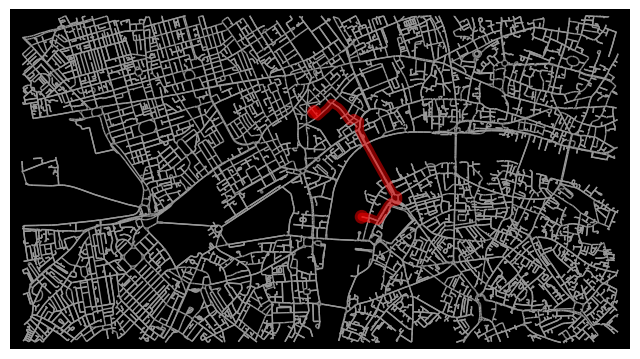

In [35]:
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [36]:
route = nx.shortest_path_length(G, source_node, target_node, weight="length")
route

2139.0260000000003